# Titanic survival classification

In [1]:
# load libraries
from e2eml.classification import classification_blueprints as cb
from e2eml.full_processing.postprocessing import save_to_production, load_for_production
from e2eml.test.classification_blueprints_test import load_titanic_data
import pandas as pd
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
import re

[nltk_data] Downloading package punkt to /home/thomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/thomas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/thomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/thomas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Feature engineering
Load & preprocess Titanic dataset. The feature engineering simulates the business knowledge part.
The code has been taken from:
https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [2]:
# load Titianic data
test_df, test_target, val_df, val_df_target, test_categorical_cols = load_titanic_data()

Create additional features and modify existing ones.
Do dataframe splits.


# Using e2eml - Run and save a pipeline
We only need a few steps to get ur full pipeline:
- Instantiate class
- Run chosen blueprint
- Save blueprint for later usage

In [3]:
# Instantiate class
titanic_auto_ml = cb.ClassificationBluePrint(datasource=test_df,
                                       target_variable=test_target,
                                       categorical_columns=test_categorical_cols,
                                       preferred_training_mode='auto',
                                       tune_mode='simple') # In this example we use 1-fold CV for hyperparameter tuning

Ml task is binary
Preferred training mode auto has been chosen. e2eml will automatically detect, if LGBM and Xgboost can use GPU acceleration and optimize the workflow accordingly.


Started Execute test train split at 18:47:42.
Started Apply datetime transformation at 18:47:42.
Started Start Spacy, POS tagging at 18:47:42.
Started PCA POS tags at 18:47:44.
Started PCA POS tags at 18:47:46.
Started PCA POS tags at 18:47:47.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 264 to 102
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      640 non-null    int64  
 1   Pclass           640 non-null    int64  
 2   Name             640 non-null    object 
 3   Sex              640 non-null    object 
 4   Age              640 non-null    int64  
 5   SibSp            640 non-null    int64  
 6   Parch            640 non-null    int64  
 7   Ticket           640 non-null    object 
 8   Fare             640 non-null    int64  
 9   Cabin            640 non-null    object 
 10  Embarked         639 non-null    object 
 11  Deck             640 non-null    int64  
 12 

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


Started Execute categorical encoding at 18:47:49.
Started  Delete columns with high share of NULLs at 18:47:50.
Started Fill nulls at 18:47:50.
Started Execute numerical binning at 18:47:50.
Started Handle outliers at 18:47:50.
Started Remove collinearity at 18:47:50.
Started Execute clustering as a feature at 18:47:50.
Started Scale data at 18:47:50.
Started Execute clustering as a feature at 18:47:51.
Started Execute clustering as a feature at 18:47:51.
Started Execute clustering as a feature at 18:47:51.
Started Execute clustering as a feature at 18:47:51.
Started Execute clustering as a feature at 18:47:52.
Started Execute clustering as a feature at 18:47:52.
Started Execute clustering as a feature at 18:47:52.
Started Execute clustering as a feature at 18:47:53.
Started Select best features at 18:47:53.
Features before selection are...PassengerId
Features before selection are...Pclass
Features before selection are...Sex
Features before selection are...Age
Features before selection

Found `num_iterations` in params. Will use it instead of argument
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[I 2021-08-01 18:47:54,211] A new study created in memory with name: no-name-72ec7788-3034-44b7-9e09-6af7dd5c52e5


Started Sort columns alphabetically at 18:47:54.
Started Train LGBM at 18:47:54.
Started Check LGBM for GPU acceleration. at 18:47:54.
LGBM uses CPU.


Found `num_boost_round` in params. Will use it instead of argument
invalid value encountered in double_scalars
[I 2021-08-01 18:47:58,205] Trial 0 finished with value: 0.0 and parameters: {'num_boost_round': 30014, 'lambda_l1': 16.65698286195227, 'lambda_l2': 121172.06871621075, 'num_leaves': 194, 'feature_fraction': 0.6634839517111786, 'bagging_freq': 1, 'min_child_samples': 32, 'learning_rate': 0.0008093849294437787}. Best is trial 0 with value: 0.0.
[I 2021-08-01 18:47:59,477] Trial 1 finished with value: 0.0 and parameters: {'num_boost_round': 19128, 'lambda_l1': 110038.79571974179, 'lambda_l2': 434087.7973331445, 'num_leaves': 125, 'feature_fraction': 0.559407021029384, 'bagging_freq': 7, 'min_child_samples': 35, 'learning_rate': 3.7434559157483114e-05}. Best is trial 0 with value: 0.0.
[I 2021-08-01 18:48:08,100] Trial 2 finished with value: 0.0 and parameters: {'num_boost_round': 37589, 'lambda_l1': 42.146126087675356, 'lambda_l2': 11376.039846450609, 'num_leaves': 42, 'feature_

[I 2021-08-01 18:49:32,572] Trial 22 finished with value: 0.6766649524509584 and parameters: {'num_boost_round': 25377, 'lambda_l1': 1.5451240433032676, 'lambda_l2': 621.4065548454882, 'num_leaves': 92, 'feature_fraction': 0.8989753198657627, 'bagging_freq': 3, 'min_child_samples': 14, 'learning_rate': 0.09955207028375368}. Best is trial 21 with value: 0.6891608599474016.
[I 2021-08-01 18:49:47,960] Trial 23 finished with value: 0.6495983543529201 and parameters: {'num_boost_round': 25509, 'lambda_l1': 1.1573848916960296, 'lambda_l2': 899.8590142533752, 'num_leaves': 86, 'feature_fraction': 0.8986239068115495, 'bagging_freq': 3, 'min_child_samples': 25, 'learning_rate': 0.05277852918785428}. Best is trial 21 with value: 0.6891608599474016.
[I 2021-08-01 18:49:52,378] Trial 24 finished with value: 0.6353601653255732 and parameters: {'num_boost_round': 26243, 'lambda_l1': 5.186898679655056, 'lambda_l2': 397.16642636246075, 'num_leaves': 87, 'feature_fraction': 0.7974595913102044, 'baggin

[1]	train's binary_logloss: 0.667524	valid's binary_logloss: 0.66179
Training until validation scores don't improve for 10 rounds
[2]	train's binary_logloss: 0.667436	valid's binary_logloss: 0.661693
[3]	train's binary_logloss: 0.667343	valid's binary_logloss: 0.66159
[4]	train's binary_logloss: 0.667255	valid's binary_logloss: 0.661493
[5]	train's binary_logloss: 0.667173	valid's binary_logloss: 0.661398
[6]	train's binary_logloss: 0.667081	valid's binary_logloss: 0.661294
[7]	train's binary_logloss: 0.666989	valid's binary_logloss: 0.661191
[8]	train's binary_logloss: 0.666907	valid's binary_logloss: 0.661096
[9]	train's binary_logloss: 0.666815	valid's binary_logloss: 0.660993
[10]	train's binary_logloss: 0.666723	valid's binary_logloss: 0.66089
[11]	train's binary_logloss: 0.666631	valid's binary_logloss: 0.660787
[12]	train's binary_logloss: 0.666539	valid's binary_logloss: 0.660684
[13]	train's binary_logloss: 0.666448	valid's binary_logloss: 0.660582
[14]	train's binary_logloss:

[515]	train's binary_logloss: 0.6271	valid's binary_logloss: 0.616254
[516]	train's binary_logloss: 0.62703	valid's binary_logloss: 0.616176
[517]	train's binary_logloss: 0.626962	valid's binary_logloss: 0.616103
[518]	train's binary_logloss: 0.626895	valid's binary_logloss: 0.61603
[519]	train's binary_logloss: 0.626824	valid's binary_logloss: 0.615952
[520]	train's binary_logloss: 0.626753	valid's binary_logloss: 0.615872
[521]	train's binary_logloss: 0.626683	valid's binary_logloss: 0.615793
[522]	train's binary_logloss: 0.626612	valid's binary_logloss: 0.615714
[523]	train's binary_logloss: 0.626542	valid's binary_logloss: 0.615634
[524]	train's binary_logloss: 0.626471	valid's binary_logloss: 0.615555
[525]	train's binary_logloss: 0.626401	valid's binary_logloss: 0.615476
[526]	train's binary_logloss: 0.62633	valid's binary_logloss: 0.615397
[527]	train's binary_logloss: 0.62626	valid's binary_logloss: 0.615318
[528]	train's binary_logloss: 0.62619	valid's binary_logloss: 0.61524


[969]	train's binary_logloss: 0.599122	valid's binary_logloss: 0.584529
[970]	train's binary_logloss: 0.599072	valid's binary_logloss: 0.584469
[971]	train's binary_logloss: 0.599018	valid's binary_logloss: 0.58441
[972]	train's binary_logloss: 0.598989	valid's binary_logloss: 0.58439
[973]	train's binary_logloss: 0.598933	valid's binary_logloss: 0.584324
[974]	train's binary_logloss: 0.598876	valid's binary_logloss: 0.58426
[975]	train's binary_logloss: 0.598822	valid's binary_logloss: 0.584201
[976]	train's binary_logloss: 0.598766	valid's binary_logloss: 0.584137
[977]	train's binary_logloss: 0.598709	valid's binary_logloss: 0.584073
[978]	train's binary_logloss: 0.598692	valid's binary_logloss: 0.584061
[979]	train's binary_logloss: 0.598637	valid's binary_logloss: 0.583994
[980]	train's binary_logloss: 0.598581	valid's binary_logloss: 0.583929
[981]	train's binary_logloss: 0.598525	valid's binary_logloss: 0.583864
[982]	train's binary_logloss: 0.598496	valid's binary_logloss: 0.58

[1445]	train's binary_logloss: 0.575663	valid's binary_logloss: 0.557546
[1446]	train's binary_logloss: 0.575618	valid's binary_logloss: 0.557495
[1447]	train's binary_logloss: 0.575574	valid's binary_logloss: 0.557443
[1448]	train's binary_logloss: 0.575529	valid's binary_logloss: 0.557391
[1449]	train's binary_logloss: 0.575484	valid's binary_logloss: 0.55734
[1450]	train's binary_logloss: 0.57544	valid's binary_logloss: 0.557287
[1451]	train's binary_logloss: 0.575395	valid's binary_logloss: 0.557234
[1452]	train's binary_logloss: 0.57535	valid's binary_logloss: 0.557183
[1453]	train's binary_logloss: 0.575305	valid's binary_logloss: 0.557131
[1454]	train's binary_logloss: 0.57526	valid's binary_logloss: 0.557079
[1455]	train's binary_logloss: 0.575215	valid's binary_logloss: 0.557027
[1456]	train's binary_logloss: 0.57517	valid's binary_logloss: 0.556977
[1457]	train's binary_logloss: 0.575125	valid's binary_logloss: 0.556925
[1458]	train's binary_logloss: 0.57508	valid's binary_lo

[1859]	train's binary_logloss: 0.559125	valid's binary_logloss: 0.538252
[1860]	train's binary_logloss: 0.559089	valid's binary_logloss: 0.538208
[1861]	train's binary_logloss: 0.559052	valid's binary_logloss: 0.538166
[1862]	train's binary_logloss: 0.559016	valid's binary_logloss: 0.538122
[1863]	train's binary_logloss: 0.558979	valid's binary_logloss: 0.538079
[1864]	train's binary_logloss: 0.558941	valid's binary_logloss: 0.538035
[1865]	train's binary_logloss: 0.558904	valid's binary_logloss: 0.537993
[1866]	train's binary_logloss: 0.558867	valid's binary_logloss: 0.537949
[1867]	train's binary_logloss: 0.55883	valid's binary_logloss: 0.537906
[1868]	train's binary_logloss: 0.558793	valid's binary_logloss: 0.537863
[1869]	train's binary_logloss: 0.558756	valid's binary_logloss: 0.53782
[1870]	train's binary_logloss: 0.558719	valid's binary_logloss: 0.537778
[1871]	train's binary_logloss: 0.558682	valid's binary_logloss: 0.537735
[1872]	train's binary_logloss: 0.558649	valid's binar

[2400]	train's binary_logloss: 0.541754	valid's binary_logloss: 0.518104
[2401]	train's binary_logloss: 0.541724	valid's binary_logloss: 0.51807
[2402]	train's binary_logloss: 0.541695	valid's binary_logloss: 0.518035
[2403]	train's binary_logloss: 0.541665	valid's binary_logloss: 0.518
[2404]	train's binary_logloss: 0.541637	valid's binary_logloss: 0.517966
[2405]	train's binary_logloss: 0.541607	valid's binary_logloss: 0.517931
[2406]	train's binary_logloss: 0.541578	valid's binary_logloss: 0.517897
[2407]	train's binary_logloss: 0.541551	valid's binary_logloss: 0.517867
[2408]	train's binary_logloss: 0.541522	valid's binary_logloss: 0.517832
[2409]	train's binary_logloss: 0.541493	valid's binary_logloss: 0.517797
[2410]	train's binary_logloss: 0.541463	valid's binary_logloss: 0.517764
[2411]	train's binary_logloss: 0.541435	valid's binary_logloss: 0.51773
[2412]	train's binary_logloss: 0.541406	valid's binary_logloss: 0.517695
[2413]	train's binary_logloss: 0.541376	valid's binary_l

[2784]	train's binary_logloss: 0.531538	valid's binary_logloss: 0.50621
[2785]	train's binary_logloss: 0.531513	valid's binary_logloss: 0.50618
[2786]	train's binary_logloss: 0.531488	valid's binary_logloss: 0.50615
[2787]	train's binary_logloss: 0.531463	valid's binary_logloss: 0.506121
[2788]	train's binary_logloss: 0.531438	valid's binary_logloss: 0.506091
[2789]	train's binary_logloss: 0.531413	valid's binary_logloss: 0.506061
[2790]	train's binary_logloss: 0.531388	valid's binary_logloss: 0.506031
[2791]	train's binary_logloss: 0.531363	valid's binary_logloss: 0.506002
[2792]	train's binary_logloss: 0.531339	valid's binary_logloss: 0.505973
[2793]	train's binary_logloss: 0.531315	valid's binary_logloss: 0.505944
[2794]	train's binary_logloss: 0.53129	valid's binary_logloss: 0.505918
[2795]	train's binary_logloss: 0.531265	valid's binary_logloss: 0.505892
[2796]	train's binary_logloss: 0.53124	valid's binary_logloss: 0.505863
[2797]	train's binary_logloss: 0.531216	valid's binary_l

[3046]	train's binary_logloss: 0.525401	valid's binary_logloss: 0.499305
[3047]	train's binary_logloss: 0.525378	valid's binary_logloss: 0.499281
[3048]	train's binary_logloss: 0.525355	valid's binary_logloss: 0.499258
[3049]	train's binary_logloss: 0.525333	valid's binary_logloss: 0.499234
[3050]	train's binary_logloss: 0.525311	valid's binary_logloss: 0.499209
[3051]	train's binary_logloss: 0.525288	valid's binary_logloss: 0.499186
[3052]	train's binary_logloss: 0.525266	valid's binary_logloss: 0.499162
[3053]	train's binary_logloss: 0.525243	valid's binary_logloss: 0.499135
[3054]	train's binary_logloss: 0.525222	valid's binary_logloss: 0.499111
[3055]	train's binary_logloss: 0.525204	valid's binary_logloss: 0.499099
[3056]	train's binary_logloss: 0.525182	valid's binary_logloss: 0.499075
[3057]	train's binary_logloss: 0.525159	valid's binary_logloss: 0.499048
[3058]	train's binary_logloss: 0.525138	valid's binary_logloss: 0.499024
[3059]	train's binary_logloss: 0.525116	valid's bin

[3439]	train's binary_logloss: 0.517147	valid's binary_logloss: 0.49042
[3440]	train's binary_logloss: 0.517127	valid's binary_logloss: 0.490399
[3441]	train's binary_logloss: 0.517107	valid's binary_logloss: 0.490378
[3442]	train's binary_logloss: 0.517087	valid's binary_logloss: 0.490357
[3443]	train's binary_logloss: 0.517067	valid's binary_logloss: 0.490336
[3444]	train's binary_logloss: 0.517047	valid's binary_logloss: 0.490315
[3445]	train's binary_logloss: 0.517029	valid's binary_logloss: 0.490294
[3446]	train's binary_logloss: 0.517009	valid's binary_logloss: 0.490273
[3447]	train's binary_logloss: 0.516989	valid's binary_logloss: 0.490252
[3448]	train's binary_logloss: 0.516969	valid's binary_logloss: 0.490231
[3449]	train's binary_logloss: 0.516949	valid's binary_logloss: 0.49021
[3450]	train's binary_logloss: 0.516929	valid's binary_logloss: 0.490189
[3451]	train's binary_logloss: 0.51691	valid's binary_logloss: 0.490168
[3452]	train's binary_logloss: 0.516891	valid's binary

[3702]	train's binary_logloss: 0.512156	valid's binary_logloss: 0.485025
[3703]	train's binary_logloss: 0.512139	valid's binary_logloss: 0.485006
[3704]	train's binary_logloss: 0.51212	valid's binary_logloss: 0.484987
[3705]	train's binary_logloss: 0.512101	valid's binary_logloss: 0.484964
[3706]	train's binary_logloss: 0.512082	valid's binary_logloss: 0.484942
[3707]	train's binary_logloss: 0.512063	valid's binary_logloss: 0.48492
[3708]	train's binary_logloss: 0.512045	valid's binary_logloss: 0.4849
[3709]	train's binary_logloss: 0.512027	valid's binary_logloss: 0.484881
[3710]	train's binary_logloss: 0.512009	valid's binary_logloss: 0.484861
[3711]	train's binary_logloss: 0.511991	valid's binary_logloss: 0.484842
[3712]	train's binary_logloss: 0.511973	valid's binary_logloss: 0.484822
[3713]	train's binary_logloss: 0.511954	valid's binary_logloss: 0.484803
[3714]	train's binary_logloss: 0.511936	valid's binary_logloss: 0.484783
[3715]	train's binary_logloss: 0.511917	valid's binary_

[4130]	train's binary_logloss: 0.504832	valid's binary_logloss: 0.477103
[4131]	train's binary_logloss: 0.504816	valid's binary_logloss: 0.477083
[4132]	train's binary_logloss: 0.5048	valid's binary_logloss: 0.477066
[4133]	train's binary_logloss: 0.504784	valid's binary_logloss: 0.477046
[4134]	train's binary_logloss: 0.504767	valid's binary_logloss: 0.477029
[4135]	train's binary_logloss: 0.504751	valid's binary_logloss: 0.477012
[4136]	train's binary_logloss: 0.504735	valid's binary_logloss: 0.476995
[4137]	train's binary_logloss: 0.504719	valid's binary_logloss: 0.476978
[4138]	train's binary_logloss: 0.504703	valid's binary_logloss: 0.476961
[4139]	train's binary_logloss: 0.504687	valid's binary_logloss: 0.476944
[4140]	train's binary_logloss: 0.504671	valid's binary_logloss: 0.476927
[4141]	train's binary_logloss: 0.504655	valid's binary_logloss: 0.47691
[4142]	train's binary_logloss: 0.504639	valid's binary_logloss: 0.476893
[4143]	train's binary_logloss: 0.504623	valid's binary

[4682]	train's binary_logloss: 0.496705	valid's binary_logloss: 0.468493
[4683]	train's binary_logloss: 0.496691	valid's binary_logloss: 0.468479
[4684]	train's binary_logloss: 0.496677	valid's binary_logloss: 0.468465
[4685]	train's binary_logloss: 0.496663	valid's binary_logloss: 0.46845
[4686]	train's binary_logloss: 0.496652	valid's binary_logloss: 0.468439
[4687]	train's binary_logloss: 0.496638	valid's binary_logloss: 0.468424
[4688]	train's binary_logloss: 0.496624	valid's binary_logloss: 0.46841
[4689]	train's binary_logloss: 0.49661	valid's binary_logloss: 0.468395
[4690]	train's binary_logloss: 0.496597	valid's binary_logloss: 0.468387
[4691]	train's binary_logloss: 0.496584	valid's binary_logloss: 0.468373
[4692]	train's binary_logloss: 0.49657	valid's binary_logloss: 0.468358
[4693]	train's binary_logloss: 0.496556	valid's binary_logloss: 0.468344
[4694]	train's binary_logloss: 0.496543	valid's binary_logloss: 0.468329
[4695]	train's binary_logloss: 0.496529	valid's binary_

[5052]	train's binary_logloss: 0.49187	valid's binary_logloss: 0.463551
[5053]	train's binary_logloss: 0.491857	valid's binary_logloss: 0.463536
[5054]	train's binary_logloss: 0.491844	valid's binary_logloss: 0.463523
[5055]	train's binary_logloss: 0.491832	valid's binary_logloss: 0.463509
[5056]	train's binary_logloss: 0.491819	valid's binary_logloss: 0.463494
[5057]	train's binary_logloss: 0.491807	valid's binary_logloss: 0.463481
[5058]	train's binary_logloss: 0.491794	valid's binary_logloss: 0.463468
[5059]	train's binary_logloss: 0.491782	valid's binary_logloss: 0.463455
[5060]	train's binary_logloss: 0.49177	valid's binary_logloss: 0.463442
[5061]	train's binary_logloss: 0.491757	valid's binary_logloss: 0.463429
[5062]	train's binary_logloss: 0.491745	valid's binary_logloss: 0.463416
[5063]	train's binary_logloss: 0.491733	valid's binary_logloss: 0.463409
[5064]	train's binary_logloss: 0.49172	valid's binary_logloss: 0.463396
[5065]	train's binary_logloss: 0.491707	valid's binary

[5308]	train's binary_logloss: 0.488783	valid's binary_logloss: 0.460362
[5309]	train's binary_logloss: 0.488771	valid's binary_logloss: 0.46035
[5310]	train's binary_logloss: 0.48876	valid's binary_logloss: 0.460338
[5311]	train's binary_logloss: 0.488747	valid's binary_logloss: 0.460323
[5312]	train's binary_logloss: 0.488736	valid's binary_logloss: 0.460311
[5313]	train's binary_logloss: 0.488723	valid's binary_logloss: 0.460296
[5314]	train's binary_logloss: 0.488712	valid's binary_logloss: 0.460284
[5315]	train's binary_logloss: 0.4887	valid's binary_logloss: 0.460271
[5316]	train's binary_logloss: 0.488688	valid's binary_logloss: 0.460259
[5317]	train's binary_logloss: 0.488677	valid's binary_logloss: 0.460246
[5318]	train's binary_logloss: 0.488665	valid's binary_logloss: 0.46024
[5319]	train's binary_logloss: 0.488653	valid's binary_logloss: 0.460227
[5320]	train's binary_logloss: 0.488643	valid's binary_logloss: 0.460221
[5321]	train's binary_logloss: 0.488632	valid's binary_l

[5535]	train's binary_logloss: 0.486218	valid's binary_logloss: 0.457699
[5536]	train's binary_logloss: 0.486209	valid's binary_logloss: 0.457687
[5537]	train's binary_logloss: 0.486199	valid's binary_logloss: 0.457676
[5538]	train's binary_logloss: 0.486188	valid's binary_logloss: 0.457664
[5539]	train's binary_logloss: 0.486177	valid's binary_logloss: 0.457652
[5540]	train's binary_logloss: 0.486166	valid's binary_logloss: 0.45764
[5541]	train's binary_logloss: 0.486155	valid's binary_logloss: 0.457629
[5542]	train's binary_logloss: 0.486144	valid's binary_logloss: 0.457617
[5543]	train's binary_logloss: 0.486133	valid's binary_logloss: 0.457604
[5544]	train's binary_logloss: 0.486121	valid's binary_logloss: 0.45759
[5545]	train's binary_logloss: 0.48611	valid's binary_logloss: 0.457578
[5546]	train's binary_logloss: 0.486099	valid's binary_logloss: 0.457566
[5547]	train's binary_logloss: 0.48609	valid's binary_logloss: 0.457554
[5548]	train's binary_logloss: 0.486079	valid's binary_

[5944]	train's binary_logloss: 0.481961	valid's binary_logloss: 0.453376
[5945]	train's binary_logloss: 0.481951	valid's binary_logloss: 0.453367
[5946]	train's binary_logloss: 0.481941	valid's binary_logloss: 0.453358
[5947]	train's binary_logloss: 0.481932	valid's binary_logloss: 0.453349
[5948]	train's binary_logloss: 0.481922	valid's binary_logloss: 0.453344
[5949]	train's binary_logloss: 0.481912	valid's binary_logloss: 0.453339
[5950]	train's binary_logloss: 0.481903	valid's binary_logloss: 0.453329
[5951]	train's binary_logloss: 0.481893	valid's binary_logloss: 0.453323
[5952]	train's binary_logloss: 0.481883	valid's binary_logloss: 0.453312
[5953]	train's binary_logloss: 0.481872	valid's binary_logloss: 0.4533
[5954]	train's binary_logloss: 0.481862	valid's binary_logloss: 0.453289
[5955]	train's binary_logloss: 0.481852	valid's binary_logloss: 0.453279
[5956]	train's binary_logloss: 0.481842	valid's binary_logloss: 0.453268
[5957]	train's binary_logloss: 0.481832	valid's binar

[6345]	train's binary_logloss: 0.478174	valid's binary_logloss: 0.449599
[6346]	train's binary_logloss: 0.478164	valid's binary_logloss: 0.449589
[6347]	train's binary_logloss: 0.478155	valid's binary_logloss: 0.44958
[6348]	train's binary_logloss: 0.478146	valid's binary_logloss: 0.449571
[6349]	train's binary_logloss: 0.478137	valid's binary_logloss: 0.449562
[6350]	train's binary_logloss: 0.478129	valid's binary_logloss: 0.449554
[6351]	train's binary_logloss: 0.478119	valid's binary_logloss: 0.449542
[6352]	train's binary_logloss: 0.47811	valid's binary_logloss: 0.449534
[6353]	train's binary_logloss: 0.478101	valid's binary_logloss: 0.449529
[6354]	train's binary_logloss: 0.478092	valid's binary_logloss: 0.449519
[6355]	train's binary_logloss: 0.478083	valid's binary_logloss: 0.44951
[6356]	train's binary_logloss: 0.478073	valid's binary_logloss: 0.4495
[6357]	train's binary_logloss: 0.478064	valid's binary_logloss: 0.449495
[6358]	train's binary_logloss: 0.478055	valid's binary_l

[6948]	train's binary_logloss: 0.473108	valid's binary_logloss: 0.444506
[6949]	train's binary_logloss: 0.4731	valid's binary_logloss: 0.444502
[6950]	train's binary_logloss: 0.473092	valid's binary_logloss: 0.444494
[6951]	train's binary_logloss: 0.473084	valid's binary_logloss: 0.444484
[6952]	train's binary_logloss: 0.473076	valid's binary_logloss: 0.444476
[6953]	train's binary_logloss: 0.473068	valid's binary_logloss: 0.444468
[6954]	train's binary_logloss: 0.47306	valid's binary_logloss: 0.444461
[6955]	train's binary_logloss: 0.473053	valid's binary_logloss: 0.444452
[6956]	train's binary_logloss: 0.473045	valid's binary_logloss: 0.444444
[6957]	train's binary_logloss: 0.473037	valid's binary_logloss: 0.444436
[6958]	train's binary_logloss: 0.473029	valid's binary_logloss: 0.444432
[6959]	train's binary_logloss: 0.473021	valid's binary_logloss: 0.444424
[6960]	train's binary_logloss: 0.473014	valid's binary_logloss: 0.444417
[6961]	train's binary_logloss: 0.473007	valid's binary

[7455]	train's binary_logloss: 0.469334	valid's binary_logloss: 0.440717
[7456]	train's binary_logloss: 0.469327	valid's binary_logloss: 0.44071
[7457]	train's binary_logloss: 0.46932	valid's binary_logloss: 0.440704
[7458]	train's binary_logloss: 0.469312	valid's binary_logloss: 0.440696
[7459]	train's binary_logloss: 0.469306	valid's binary_logloss: 0.440689
[7460]	train's binary_logloss: 0.469299	valid's binary_logloss: 0.440682
[7461]	train's binary_logloss: 0.469291	valid's binary_logloss: 0.440675
[7462]	train's binary_logloss: 0.469285	valid's binary_logloss: 0.440669
[7463]	train's binary_logloss: 0.469278	valid's binary_logloss: 0.440664
[7464]	train's binary_logloss: 0.469271	valid's binary_logloss: 0.440657
[7465]	train's binary_logloss: 0.469263	valid's binary_logloss: 0.440649
[7466]	train's binary_logloss: 0.469256	valid's binary_logloss: 0.440642
[7467]	train's binary_logloss: 0.469249	valid's binary_logloss: 0.440634
[7468]	train's binary_logloss: 0.469242	valid's binar

[8084]	train's binary_logloss: 0.465162	valid's binary_logloss: 0.436511
[8085]	train's binary_logloss: 0.465156	valid's binary_logloss: 0.436506
[8086]	train's binary_logloss: 0.465149	valid's binary_logloss: 0.436498
[8087]	train's binary_logloss: 0.465143	valid's binary_logloss: 0.436492
[8088]	train's binary_logloss: 0.465137	valid's binary_logloss: 0.436486
[8089]	train's binary_logloss: 0.46513	valid's binary_logloss: 0.436478
[8090]	train's binary_logloss: 0.465124	valid's binary_logloss: 0.43647
[8091]	train's binary_logloss: 0.465118	valid's binary_logloss: 0.436464
[8092]	train's binary_logloss: 0.465111	valid's binary_logloss: 0.436459
[8093]	train's binary_logloss: 0.465105	valid's binary_logloss: 0.436453
[8094]	train's binary_logloss: 0.465098	valid's binary_logloss: 0.436445
[8095]	train's binary_logloss: 0.465092	valid's binary_logloss: 0.436439
[8096]	train's binary_logloss: 0.465086	valid's binary_logloss: 0.436434
[8097]	train's binary_logloss: 0.46508	valid's binary

[8584]	train's binary_logloss: 0.462215	valid's binary_logloss: 0.433424
[8585]	train's binary_logloss: 0.462209	valid's binary_logloss: 0.433419
[8586]	train's binary_logloss: 0.462204	valid's binary_logloss: 0.433413
[8587]	train's binary_logloss: 0.462198	valid's binary_logloss: 0.433407
[8588]	train's binary_logloss: 0.462192	valid's binary_logloss: 0.4334
[8589]	train's binary_logloss: 0.462187	valid's binary_logloss: 0.433395
[8590]	train's binary_logloss: 0.462181	valid's binary_logloss: 0.433389
[8591]	train's binary_logloss: 0.462177	valid's binary_logloss: 0.433383
[8592]	train's binary_logloss: 0.462171	valid's binary_logloss: 0.433378
[8593]	train's binary_logloss: 0.462166	valid's binary_logloss: 0.433373
[8594]	train's binary_logloss: 0.46216	valid's binary_logloss: 0.433367
[8595]	train's binary_logloss: 0.462154	valid's binary_logloss: 0.433362
[8596]	train's binary_logloss: 0.462149	valid's binary_logloss: 0.433356
[8597]	train's binary_logloss: 0.462143	valid's binary

[9103]	train's binary_logloss: 0.45947	valid's binary_logloss: 0.43055
[9104]	train's binary_logloss: 0.459465	valid's binary_logloss: 0.430545
[9105]	train's binary_logloss: 0.45946	valid's binary_logloss: 0.430541
[9106]	train's binary_logloss: 0.459455	valid's binary_logloss: 0.430535
[9107]	train's binary_logloss: 0.45945	valid's binary_logloss: 0.430531
[9108]	train's binary_logloss: 0.459444	valid's binary_logloss: 0.430524
[9109]	train's binary_logloss: 0.459439	valid's binary_logloss: 0.430519
[9110]	train's binary_logloss: 0.459434	valid's binary_logloss: 0.430513
[9111]	train's binary_logloss: 0.459428	valid's binary_logloss: 0.430506
[9112]	train's binary_logloss: 0.459424	valid's binary_logloss: 0.430502
[9113]	train's binary_logloss: 0.459419	valid's binary_logloss: 0.430497
[9114]	train's binary_logloss: 0.459414	valid's binary_logloss: 0.430492
[9115]	train's binary_logloss: 0.459409	valid's binary_logloss: 0.430488
[9116]	train's binary_logloss: 0.459404	valid's binary_

[9608]	train's binary_logloss: 0.457038	valid's binary_logloss: 0.428042
[9609]	train's binary_logloss: 0.457034	valid's binary_logloss: 0.428038
[9610]	train's binary_logloss: 0.457029	valid's binary_logloss: 0.428031
[9611]	train's binary_logloss: 0.457024	valid's binary_logloss: 0.428027
[9612]	train's binary_logloss: 0.457019	valid's binary_logloss: 0.428023
[9613]	train's binary_logloss: 0.457015	valid's binary_logloss: 0.428019
[9614]	train's binary_logloss: 0.45701	valid's binary_logloss: 0.428013
[9615]	train's binary_logloss: 0.457006	valid's binary_logloss: 0.428009
[9616]	train's binary_logloss: 0.457001	valid's binary_logloss: 0.428003
[9617]	train's binary_logloss: 0.456996	valid's binary_logloss: 0.427997
[9618]	train's binary_logloss: 0.456991	valid's binary_logloss: 0.427991
[9619]	train's binary_logloss: 0.456987	valid's binary_logloss: 0.427987
[9620]	train's binary_logloss: 0.456983	valid's binary_logloss: 0.427984
[9621]	train's binary_logloss: 0.456979	valid's bina

[10160]	train's binary_logloss: 0.454651	valid's binary_logloss: 0.425633
[10161]	train's binary_logloss: 0.454647	valid's binary_logloss: 0.425629
[10162]	train's binary_logloss: 0.454643	valid's binary_logloss: 0.425625
[10163]	train's binary_logloss: 0.454639	valid's binary_logloss: 0.42562
[10164]	train's binary_logloss: 0.454634	valid's binary_logloss: 0.425616
[10165]	train's binary_logloss: 0.45463	valid's binary_logloss: 0.425612
[10166]	train's binary_logloss: 0.454626	valid's binary_logloss: 0.425608
[10167]	train's binary_logloss: 0.454622	valid's binary_logloss: 0.425603
[10168]	train's binary_logloss: 0.454618	valid's binary_logloss: 0.425599
[10169]	train's binary_logloss: 0.454613	valid's binary_logloss: 0.425595
[10170]	train's binary_logloss: 0.454609	valid's binary_logloss: 0.425591
[10171]	train's binary_logloss: 0.454605	valid's binary_logloss: 0.425587
[10172]	train's binary_logloss: 0.454601	valid's binary_logloss: 0.425583
[10173]	train's binary_logloss: 0.454596

[10700]	train's binary_logloss: 0.452554	valid's binary_logloss: 0.423558
[10701]	train's binary_logloss: 0.45255	valid's binary_logloss: 0.423555
[10702]	train's binary_logloss: 0.452546	valid's binary_logloss: 0.423551
[10703]	train's binary_logloss: 0.452543	valid's binary_logloss: 0.423548
[10704]	train's binary_logloss: 0.452539	valid's binary_logloss: 0.423544
[10705]	train's binary_logloss: 0.452535	valid's binary_logloss: 0.423541
[10706]	train's binary_logloss: 0.452531	valid's binary_logloss: 0.423537
[10707]	train's binary_logloss: 0.452527	valid's binary_logloss: 0.423533
[10708]	train's binary_logloss: 0.452524	valid's binary_logloss: 0.423529
[10709]	train's binary_logloss: 0.45252	valid's binary_logloss: 0.423526
[10710]	train's binary_logloss: 0.452517	valid's binary_logloss: 0.423523
[10711]	train's binary_logloss: 0.452513	valid's binary_logloss: 0.423519
[10712]	train's binary_logloss: 0.45251	valid's binary_logloss: 0.423516
[10713]	train's binary_logloss: 0.452506	

[11137]	train's binary_logloss: 0.450994	valid's binary_logloss: 0.422044
[11138]	train's binary_logloss: 0.45099	valid's binary_logloss: 0.42204
[11139]	train's binary_logloss: 0.450987	valid's binary_logloss: 0.422037
[11140]	train's binary_logloss: 0.450983	valid's binary_logloss: 0.422033
[11141]	train's binary_logloss: 0.45098	valid's binary_logloss: 0.422029
[11142]	train's binary_logloss: 0.450976	valid's binary_logloss: 0.422026
[11143]	train's binary_logloss: 0.450972	valid's binary_logloss: 0.422022
[11144]	train's binary_logloss: 0.450969	valid's binary_logloss: 0.422019
[11145]	train's binary_logloss: 0.450965	valid's binary_logloss: 0.422016
[11146]	train's binary_logloss: 0.450962	valid's binary_logloss: 0.422012
[11147]	train's binary_logloss: 0.450958	valid's binary_logloss: 0.422008
[11148]	train's binary_logloss: 0.450955	valid's binary_logloss: 0.422005
[11149]	train's binary_logloss: 0.450951	valid's binary_logloss: 0.422001
[11150]	train's binary_logloss: 0.450948	

[11659]	train's binary_logloss: 0.449257	valid's binary_logloss: 0.420379
[11660]	train's binary_logloss: 0.449254	valid's binary_logloss: 0.420376
[11661]	train's binary_logloss: 0.449251	valid's binary_logloss: 0.420374
[11662]	train's binary_logloss: 0.449248	valid's binary_logloss: 0.420371
[11663]	train's binary_logloss: 0.449245	valid's binary_logloss: 0.420368
[11664]	train's binary_logloss: 0.449242	valid's binary_logloss: 0.420365
[11665]	train's binary_logloss: 0.449239	valid's binary_logloss: 0.420362
[11666]	train's binary_logloss: 0.449235	valid's binary_logloss: 0.420359
[11667]	train's binary_logloss: 0.449232	valid's binary_logloss: 0.420357
[11668]	train's binary_logloss: 0.449229	valid's binary_logloss: 0.420354
[11669]	train's binary_logloss: 0.449225	valid's binary_logloss: 0.420351
[11670]	train's binary_logloss: 0.449222	valid's binary_logloss: 0.420348
[11671]	train's binary_logloss: 0.449219	valid's binary_logloss: 0.420345
[11672]	train's binary_logloss: 0.4492

[12184]	train's binary_logloss: 0.447626	valid's binary_logloss: 0.418854
[12185]	train's binary_logloss: 0.447623	valid's binary_logloss: 0.418852
[12186]	train's binary_logloss: 0.44762	valid's binary_logloss: 0.418849
[12187]	train's binary_logloss: 0.447617	valid's binary_logloss: 0.418846
[12188]	train's binary_logloss: 0.447615	valid's binary_logloss: 0.418843
[12189]	train's binary_logloss: 0.447612	valid's binary_logloss: 0.418841
[12190]	train's binary_logloss: 0.447609	valid's binary_logloss: 0.418838
[12191]	train's binary_logloss: 0.447606	valid's binary_logloss: 0.418836
[12192]	train's binary_logloss: 0.447603	valid's binary_logloss: 0.418833
[12193]	train's binary_logloss: 0.4476	valid's binary_logloss: 0.418831
[12194]	train's binary_logloss: 0.447597	valid's binary_logloss: 0.418828
[12195]	train's binary_logloss: 0.447594	valid's binary_logloss: 0.418825
[12196]	train's binary_logloss: 0.447591	valid's binary_logloss: 0.418823
[12197]	train's binary_logloss: 0.447588	

[12700]	train's binary_logloss: 0.446137	valid's binary_logloss: 0.417452
[12701]	train's binary_logloss: 0.446134	valid's binary_logloss: 0.417449
[12702]	train's binary_logloss: 0.446131	valid's binary_logloss: 0.417446
[12703]	train's binary_logloss: 0.446128	valid's binary_logloss: 0.417443
[12704]	train's binary_logloss: 0.446126	valid's binary_logloss: 0.41744
[12705]	train's binary_logloss: 0.446124	valid's binary_logloss: 0.417438
[12706]	train's binary_logloss: 0.446121	valid's binary_logloss: 0.417436
[12707]	train's binary_logloss: 0.446118	valid's binary_logloss: 0.417433
[12708]	train's binary_logloss: 0.446115	valid's binary_logloss: 0.417431
[12709]	train's binary_logloss: 0.446112	valid's binary_logloss: 0.417428
[12710]	train's binary_logloss: 0.446109	valid's binary_logloss: 0.417425
[12711]	train's binary_logloss: 0.446107	valid's binary_logloss: 0.417423
[12712]	train's binary_logloss: 0.446104	valid's binary_logloss: 0.41742
[12713]	train's binary_logloss: 0.446102

[13236]	train's binary_logloss: 0.444691	valid's binary_logloss: 0.416107
[13237]	train's binary_logloss: 0.444688	valid's binary_logloss: 0.416105
[13238]	train's binary_logloss: 0.444685	valid's binary_logloss: 0.416102
[13239]	train's binary_logloss: 0.444682	valid's binary_logloss: 0.4161
[13240]	train's binary_logloss: 0.44468	valid's binary_logloss: 0.416098
[13241]	train's binary_logloss: 0.444677	valid's binary_logloss: 0.416095
[13242]	train's binary_logloss: 0.444674	valid's binary_logloss: 0.416092
[13243]	train's binary_logloss: 0.444672	valid's binary_logloss: 0.41609
[13244]	train's binary_logloss: 0.444669	valid's binary_logloss: 0.416087
[13245]	train's binary_logloss: 0.444666	valid's binary_logloss: 0.416085
[13246]	train's binary_logloss: 0.444663	valid's binary_logloss: 0.416084
[13247]	train's binary_logloss: 0.444661	valid's binary_logloss: 0.416082
[13248]	train's binary_logloss: 0.444658	valid's binary_logloss: 0.416079
[13249]	train's binary_logloss: 0.444655	v

[13753]	train's binary_logloss: 0.443388	valid's binary_logloss: 0.414925
[13754]	train's binary_logloss: 0.443386	valid's binary_logloss: 0.414922
[13755]	train's binary_logloss: 0.443383	valid's binary_logloss: 0.414919
[13756]	train's binary_logloss: 0.443381	valid's binary_logloss: 0.414917
[13757]	train's binary_logloss: 0.443379	valid's binary_logloss: 0.414914
[13758]	train's binary_logloss: 0.443376	valid's binary_logloss: 0.414912
[13759]	train's binary_logloss: 0.443374	valid's binary_logloss: 0.41491
[13760]	train's binary_logloss: 0.443371	valid's binary_logloss: 0.414907
[13761]	train's binary_logloss: 0.443369	valid's binary_logloss: 0.414905
[13762]	train's binary_logloss: 0.443366	valid's binary_logloss: 0.414902
[13763]	train's binary_logloss: 0.443363	valid's binary_logloss: 0.4149
[13764]	train's binary_logloss: 0.443361	valid's binary_logloss: 0.414899
[13765]	train's binary_logloss: 0.443358	valid's binary_logloss: 0.414896
[13766]	train's binary_logloss: 0.443356	

[14284]	train's binary_logloss: 0.442124	valid's binary_logloss: 0.413756
[14285]	train's binary_logloss: 0.442121	valid's binary_logloss: 0.413753
[14286]	train's binary_logloss: 0.442119	valid's binary_logloss: 0.413751
[14287]	train's binary_logloss: 0.442117	valid's binary_logloss: 0.413749
[14288]	train's binary_logloss: 0.442114	valid's binary_logloss: 0.413746
[14289]	train's binary_logloss: 0.442112	valid's binary_logloss: 0.413744
[14290]	train's binary_logloss: 0.44211	valid's binary_logloss: 0.413742
[14291]	train's binary_logloss: 0.442108	valid's binary_logloss: 0.41374
[14292]	train's binary_logloss: 0.442105	valid's binary_logloss: 0.413738
[14293]	train's binary_logloss: 0.442103	valid's binary_logloss: 0.413736
[14294]	train's binary_logloss: 0.442101	valid's binary_logloss: 0.413734
[14295]	train's binary_logloss: 0.442098	valid's binary_logloss: 0.413731
[14296]	train's binary_logloss: 0.442096	valid's binary_logloss: 0.41373
[14297]	train's binary_logloss: 0.442094	

[14801]	train's binary_logloss: 0.441034	valid's binary_logloss: 0.41274
[14802]	train's binary_logloss: 0.441032	valid's binary_logloss: 0.412738
[14803]	train's binary_logloss: 0.44103	valid's binary_logloss: 0.412736
[14804]	train's binary_logloss: 0.441028	valid's binary_logloss: 0.412734
[14805]	train's binary_logloss: 0.441025	valid's binary_logloss: 0.412732
[14806]	train's binary_logloss: 0.441023	valid's binary_logloss: 0.412729
[14807]	train's binary_logloss: 0.441021	valid's binary_logloss: 0.412728
[14808]	train's binary_logloss: 0.441019	valid's binary_logloss: 0.412726
[14809]	train's binary_logloss: 0.441017	valid's binary_logloss: 0.412724
[14810]	train's binary_logloss: 0.441015	valid's binary_logloss: 0.412722
[14811]	train's binary_logloss: 0.441013	valid's binary_logloss: 0.412719
[14812]	train's binary_logloss: 0.441011	valid's binary_logloss: 0.412718
[14813]	train's binary_logloss: 0.441009	valid's binary_logloss: 0.412716
[14814]	train's binary_logloss: 0.441007

[15281]	train's binary_logloss: 0.440109	valid's binary_logloss: 0.41187
[15282]	train's binary_logloss: 0.440107	valid's binary_logloss: 0.411868
[15283]	train's binary_logloss: 0.440105	valid's binary_logloss: 0.411867
[15284]	train's binary_logloss: 0.440103	valid's binary_logloss: 0.411864
[15285]	train's binary_logloss: 0.440101	valid's binary_logloss: 0.411863
[15286]	train's binary_logloss: 0.440099	valid's binary_logloss: 0.411861
[15287]	train's binary_logloss: 0.440097	valid's binary_logloss: 0.411859
[15288]	train's binary_logloss: 0.440095	valid's binary_logloss: 0.411857
[15289]	train's binary_logloss: 0.440093	valid's binary_logloss: 0.411856
[15290]	train's binary_logloss: 0.440092	valid's binary_logloss: 0.411854
[15291]	train's binary_logloss: 0.44009	valid's binary_logloss: 0.411853
[15292]	train's binary_logloss: 0.440088	valid's binary_logloss: 0.411851
[15293]	train's binary_logloss: 0.440086	valid's binary_logloss: 0.41185
[15294]	train's binary_logloss: 0.440084	

[15879]	train's binary_logloss: 0.439072	valid's binary_logloss: 0.410905
[15880]	train's binary_logloss: 0.43907	valid's binary_logloss: 0.410903
[15881]	train's binary_logloss: 0.439069	valid's binary_logloss: 0.410902
[15882]	train's binary_logloss: 0.439067	valid's binary_logloss: 0.4109
[15883]	train's binary_logloss: 0.439066	valid's binary_logloss: 0.410898
[15884]	train's binary_logloss: 0.439064	valid's binary_logloss: 0.410897
[15885]	train's binary_logloss: 0.439062	valid's binary_logloss: 0.410895
[15886]	train's binary_logloss: 0.43906	valid's binary_logloss: 0.410893
[15887]	train's binary_logloss: 0.439058	valid's binary_logloss: 0.410891
[15888]	train's binary_logloss: 0.439056	valid's binary_logloss: 0.410889
[15889]	train's binary_logloss: 0.439054	valid's binary_logloss: 0.410887
[15890]	train's binary_logloss: 0.439053	valid's binary_logloss: 0.410886
[15891]	train's binary_logloss: 0.439051	valid's binary_logloss: 0.410884
[15892]	train's binary_logloss: 0.439049	v

[16539]	train's binary_logloss: 0.438107	valid's binary_logloss: 0.409939
[16540]	train's binary_logloss: 0.438106	valid's binary_logloss: 0.409938
[16541]	train's binary_logloss: 0.438104	valid's binary_logloss: 0.409936
[16542]	train's binary_logloss: 0.438103	valid's binary_logloss: 0.409934
[16543]	train's binary_logloss: 0.438102	valid's binary_logloss: 0.409933
[16544]	train's binary_logloss: 0.438101	valid's binary_logloss: 0.409932
[16545]	train's binary_logloss: 0.4381	valid's binary_logloss: 0.40993
[16546]	train's binary_logloss: 0.438098	valid's binary_logloss: 0.409929
[16547]	train's binary_logloss: 0.438097	valid's binary_logloss: 0.409928
[16548]	train's binary_logloss: 0.438096	valid's binary_logloss: 0.409927
[16549]	train's binary_logloss: 0.438095	valid's binary_logloss: 0.409926
[16550]	train's binary_logloss: 0.438094	valid's binary_logloss: 0.409924
[16551]	train's binary_logloss: 0.438092	valid's binary_logloss: 0.409923
[16552]	train's binary_logloss: 0.438091	

[17199]	train's binary_logloss: 0.437207	valid's binary_logloss: 0.409043
[17200]	train's binary_logloss: 0.437206	valid's binary_logloss: 0.409042
[17201]	train's binary_logloss: 0.437205	valid's binary_logloss: 0.409041
[17202]	train's binary_logloss: 0.437203	valid's binary_logloss: 0.40904
[17203]	train's binary_logloss: 0.437202	valid's binary_logloss: 0.409039
[17204]	train's binary_logloss: 0.437201	valid's binary_logloss: 0.409037
[17205]	train's binary_logloss: 0.4372	valid's binary_logloss: 0.409036
[17206]	train's binary_logloss: 0.437199	valid's binary_logloss: 0.409035
[17207]	train's binary_logloss: 0.437197	valid's binary_logloss: 0.409034
[17208]	train's binary_logloss: 0.437196	valid's binary_logloss: 0.409032
[17209]	train's binary_logloss: 0.437195	valid's binary_logloss: 0.409031
[17210]	train's binary_logloss: 0.437193	valid's binary_logloss: 0.40903
[17211]	train's binary_logloss: 0.437192	valid's binary_logloss: 0.409028
[17212]	train's binary_logloss: 0.437191	v

[17499]	train's binary_logloss: 0.436829	valid's binary_logloss: 0.408667
[17500]	train's binary_logloss: 0.436828	valid's binary_logloss: 0.408666
[17501]	train's binary_logloss: 0.436827	valid's binary_logloss: 0.408665
[17502]	train's binary_logloss: 0.436826	valid's binary_logloss: 0.408664
[17503]	train's binary_logloss: 0.436825	valid's binary_logloss: 0.408663
[17504]	train's binary_logloss: 0.436824	valid's binary_logloss: 0.408662
[17505]	train's binary_logloss: 0.436823	valid's binary_logloss: 0.408661
[17506]	train's binary_logloss: 0.436822	valid's binary_logloss: 0.40866
[17507]	train's binary_logloss: 0.436821	valid's binary_logloss: 0.408659
[17508]	train's binary_logloss: 0.436819	valid's binary_logloss: 0.408657
[17509]	train's binary_logloss: 0.436818	valid's binary_logloss: 0.408656
[17510]	train's binary_logloss: 0.436817	valid's binary_logloss: 0.408655
[17511]	train's binary_logloss: 0.436816	valid's binary_logloss: 0.408655
[17512]	train's binary_logloss: 0.43681

[18153]	train's binary_logloss: 0.436072	valid's binary_logloss: 0.407923
[18154]	train's binary_logloss: 0.436071	valid's binary_logloss: 0.407922
[18155]	train's binary_logloss: 0.43607	valid's binary_logloss: 0.407921
[18156]	train's binary_logloss: 0.436069	valid's binary_logloss: 0.407919
[18157]	train's binary_logloss: 0.436068	valid's binary_logloss: 0.407919
[18158]	train's binary_logloss: 0.436066	valid's binary_logloss: 0.407917
[18159]	train's binary_logloss: 0.436065	valid's binary_logloss: 0.407916
[18160]	train's binary_logloss: 0.436064	valid's binary_logloss: 0.407915
[18161]	train's binary_logloss: 0.436063	valid's binary_logloss: 0.407914
[18162]	train's binary_logloss: 0.436063	valid's binary_logloss: 0.407914
[18163]	train's binary_logloss: 0.436061	valid's binary_logloss: 0.407913
[18164]	train's binary_logloss: 0.43606	valid's binary_logloss: 0.407912
[18165]	train's binary_logloss: 0.436059	valid's binary_logloss: 0.40791
[18166]	train's binary_logloss: 0.436058	

[18849]	train's binary_logloss: 0.435365	valid's binary_logloss: 0.407234
[18850]	train's binary_logloss: 0.435364	valid's binary_logloss: 0.407233
[18851]	train's binary_logloss: 0.435363	valid's binary_logloss: 0.407232
[18852]	train's binary_logloss: 0.435362	valid's binary_logloss: 0.407231
[18853]	train's binary_logloss: 0.435361	valid's binary_logloss: 0.40723
[18854]	train's binary_logloss: 0.43536	valid's binary_logloss: 0.407229
[18855]	train's binary_logloss: 0.43536	valid's binary_logloss: 0.407229
[18856]	train's binary_logloss: 0.435359	valid's binary_logloss: 0.407228
[18857]	train's binary_logloss: 0.435357	valid's binary_logloss: 0.407226
[18858]	train's binary_logloss: 0.435357	valid's binary_logloss: 0.407226
[18859]	train's binary_logloss: 0.435355	valid's binary_logloss: 0.407224
[18860]	train's binary_logloss: 0.435354	valid's binary_logloss: 0.407223
[18861]	train's binary_logloss: 0.435353	valid's binary_logloss: 0.407222
[18862]	train's binary_logloss: 0.435352	

[19194]	train's binary_logloss: 0.435038	valid's binary_logloss: 0.406917
[19195]	train's binary_logloss: 0.435037	valid's binary_logloss: 0.406916
[19196]	train's binary_logloss: 0.435036	valid's binary_logloss: 0.406915
[19197]	train's binary_logloss: 0.435035	valid's binary_logloss: 0.406915
[19198]	train's binary_logloss: 0.435034	valid's binary_logloss: 0.406914
[19199]	train's binary_logloss: 0.435033	valid's binary_logloss: 0.406913
[19200]	train's binary_logloss: 0.435032	valid's binary_logloss: 0.406911
[19201]	train's binary_logloss: 0.435031	valid's binary_logloss: 0.406911
[19202]	train's binary_logloss: 0.43503	valid's binary_logloss: 0.406909
[19203]	train's binary_logloss: 0.435029	valid's binary_logloss: 0.406909
[19204]	train's binary_logloss: 0.435029	valid's binary_logloss: 0.406908
[19205]	train's binary_logloss: 0.435028	valid's binary_logloss: 0.406907
[19206]	train's binary_logloss: 0.435027	valid's binary_logloss: 0.406906
[19207]	train's binary_logloss: 0.43502

[19362]	train's binary_logloss: 0.434884	valid's binary_logloss: 0.406767
[19363]	train's binary_logloss: 0.434883	valid's binary_logloss: 0.406767
[19364]	train's binary_logloss: 0.434882	valid's binary_logloss: 0.406765
[19365]	train's binary_logloss: 0.434881	valid's binary_logloss: 0.406765
[19366]	train's binary_logloss: 0.43488	valid's binary_logloss: 0.406764
[19367]	train's binary_logloss: 0.434879	valid's binary_logloss: 0.406763
[19368]	train's binary_logloss: 0.434878	valid's binary_logloss: 0.406762
[19369]	train's binary_logloss: 0.434877	valid's binary_logloss: 0.406761
[19370]	train's binary_logloss: 0.434876	valid's binary_logloss: 0.40676
[19371]	train's binary_logloss: 0.434876	valid's binary_logloss: 0.40676
[19372]	train's binary_logloss: 0.434875	valid's binary_logloss: 0.406759
[19373]	train's binary_logloss: 0.434874	valid's binary_logloss: 0.406758
[19374]	train's binary_logloss: 0.434874	valid's binary_logloss: 0.406758
[19375]	train's binary_logloss: 0.434873	

[19657]	train's binary_logloss: 0.434625	valid's binary_logloss: 0.406517
[19658]	train's binary_logloss: 0.434624	valid's binary_logloss: 0.406516
[19659]	train's binary_logloss: 0.434623	valid's binary_logloss: 0.406515
[19660]	train's binary_logloss: 0.434622	valid's binary_logloss: 0.406514
[19661]	train's binary_logloss: 0.434621	valid's binary_logloss: 0.406513
[19662]	train's binary_logloss: 0.434621	valid's binary_logloss: 0.406513
[19663]	train's binary_logloss: 0.434619	valid's binary_logloss: 0.406511
[19664]	train's binary_logloss: 0.434619	valid's binary_logloss: 0.406511
[19665]	train's binary_logloss: 0.434617	valid's binary_logloss: 0.40651
[19666]	train's binary_logloss: 0.434617	valid's binary_logloss: 0.406509
[19667]	train's binary_logloss: 0.434615	valid's binary_logloss: 0.406508
[19668]	train's binary_logloss: 0.434615	valid's binary_logloss: 0.406507
[19669]	train's binary_logloss: 0.434614	valid's binary_logloss: 0.406506
[19670]	train's binary_logloss: 0.43461

[20005]	train's binary_logloss: 0.434331	valid's binary_logloss: 0.406231
[20006]	train's binary_logloss: 0.43433	valid's binary_logloss: 0.40623
[20007]	train's binary_logloss: 0.434329	valid's binary_logloss: 0.406229
[20008]	train's binary_logloss: 0.434329	valid's binary_logloss: 0.406229
[20009]	train's binary_logloss: 0.434328	valid's binary_logloss: 0.406228
[20010]	train's binary_logloss: 0.434327	valid's binary_logloss: 0.406227
[20011]	train's binary_logloss: 0.434326	valid's binary_logloss: 0.406227
[20012]	train's binary_logloss: 0.434325	valid's binary_logloss: 0.406226
[20013]	train's binary_logloss: 0.434324	valid's binary_logloss: 0.406225
[20014]	train's binary_logloss: 0.434324	valid's binary_logloss: 0.406224
[20015]	train's binary_logloss: 0.434322	valid's binary_logloss: 0.406223
[20016]	train's binary_logloss: 0.434322	valid's binary_logloss: 0.406222
[20017]	train's binary_logloss: 0.434321	valid's binary_logloss: 0.406221
[20018]	train's binary_logloss: 0.43432	

[20196]	train's binary_logloss: 0.434176	valid's binary_logloss: 0.406083
[20197]	train's binary_logloss: 0.434175	valid's binary_logloss: 0.406082
[20198]	train's binary_logloss: 0.434174	valid's binary_logloss: 0.406081
[20199]	train's binary_logloss: 0.434173	valid's binary_logloss: 0.40608
[20200]	train's binary_logloss: 0.434172	valid's binary_logloss: 0.40608
[20201]	train's binary_logloss: 0.434171	valid's binary_logloss: 0.406079
[20202]	train's binary_logloss: 0.43417	valid's binary_logloss: 0.406078
[20203]	train's binary_logloss: 0.43417	valid's binary_logloss: 0.406077
[20204]	train's binary_logloss: 0.434169	valid's binary_logloss: 0.406076
[20205]	train's binary_logloss: 0.434168	valid's binary_logloss: 0.406076
[20206]	train's binary_logloss: 0.434168	valid's binary_logloss: 0.406075
[20207]	train's binary_logloss: 0.434167	valid's binary_logloss: 0.406074
[20208]	train's binary_logloss: 0.434166	valid's binary_logloss: 0.406074
[20209]	train's binary_logloss: 0.434165	v

[20365]	train's binary_logloss: 0.434042	valid's binary_logloss: 0.405955
[20366]	train's binary_logloss: 0.434041	valid's binary_logloss: 0.405954
[20367]	train's binary_logloss: 0.43404	valid's binary_logloss: 0.405953
[20368]	train's binary_logloss: 0.434039	valid's binary_logloss: 0.405953
[20369]	train's binary_logloss: 0.434039	valid's binary_logloss: 0.405952
[20370]	train's binary_logloss: 0.434038	valid's binary_logloss: 0.405951
[20371]	train's binary_logloss: 0.434037	valid's binary_logloss: 0.405951
[20372]	train's binary_logloss: 0.434036	valid's binary_logloss: 0.40595
[20373]	train's binary_logloss: 0.434035	valid's binary_logloss: 0.405949
[20374]	train's binary_logloss: 0.434035	valid's binary_logloss: 0.405949
[20375]	train's binary_logloss: 0.434034	valid's binary_logloss: 0.405948
[20376]	train's binary_logloss: 0.434033	valid's binary_logloss: 0.405947
[20377]	train's binary_logloss: 0.434032	valid's binary_logloss: 0.405946
[20378]	train's binary_logloss: 0.434031

[20839]	train's binary_logloss: 0.433677	valid's binary_logloss: 0.405609
[20840]	train's binary_logloss: 0.433676	valid's binary_logloss: 0.405608
[20841]	train's binary_logloss: 0.433676	valid's binary_logloss: 0.405607
[20842]	train's binary_logloss: 0.433675	valid's binary_logloss: 0.405606
[20843]	train's binary_logloss: 0.433674	valid's binary_logloss: 0.405606
[20844]	train's binary_logloss: 0.433673	valid's binary_logloss: 0.405605
[20845]	train's binary_logloss: 0.433673	valid's binary_logloss: 0.405604
[20846]	train's binary_logloss: 0.433671	valid's binary_logloss: 0.405603
[20847]	train's binary_logloss: 0.433671	valid's binary_logloss: 0.405603
[20848]	train's binary_logloss: 0.43367	valid's binary_logloss: 0.405602
[20849]	train's binary_logloss: 0.433669	valid's binary_logloss: 0.405601
[20850]	train's binary_logloss: 0.433668	valid's binary_logloss: 0.4056
[20851]	train's binary_logloss: 0.433668	valid's binary_logloss: 0.4056
[20852]	train's binary_logloss: 0.433666	va

[21425]	train's binary_logloss: 0.433254	valid's binary_logloss: 0.405208
[21426]	train's binary_logloss: 0.433253	valid's binary_logloss: 0.405207
[21427]	train's binary_logloss: 0.433253	valid's binary_logloss: 0.405207
[21428]	train's binary_logloss: 0.433252	valid's binary_logloss: 0.405206
[21429]	train's binary_logloss: 0.433251	valid's binary_logloss: 0.405206
[21430]	train's binary_logloss: 0.43325	valid's binary_logloss: 0.405205
[21431]	train's binary_logloss: 0.433249	valid's binary_logloss: 0.405204
[21432]	train's binary_logloss: 0.433248	valid's binary_logloss: 0.405203
[21433]	train's binary_logloss: 0.433248	valid's binary_logloss: 0.405203
[21434]	train's binary_logloss: 0.433248	valid's binary_logloss: 0.405203
[21435]	train's binary_logloss: 0.433246	valid's binary_logloss: 0.405202
[21436]	train's binary_logloss: 0.433246	valid's binary_logloss: 0.405201
[21437]	train's binary_logloss: 0.433245	valid's binary_logloss: 0.4052
[21438]	train's binary_logloss: 0.433245	

[21909]	train's binary_logloss: 0.432926	valid's binary_logloss: 0.404899
[21910]	train's binary_logloss: 0.432925	valid's binary_logloss: 0.404899
[21911]	train's binary_logloss: 0.432924	valid's binary_logloss: 0.404898
[21912]	train's binary_logloss: 0.432924	valid's binary_logloss: 0.404897
[21913]	train's binary_logloss: 0.432923	valid's binary_logloss: 0.404897
[21914]	train's binary_logloss: 0.432922	valid's binary_logloss: 0.404896
[21915]	train's binary_logloss: 0.432921	valid's binary_logloss: 0.404895
[21916]	train's binary_logloss: 0.432921	valid's binary_logloss: 0.404895
[21917]	train's binary_logloss: 0.43292	valid's binary_logloss: 0.404894
[21918]	train's binary_logloss: 0.432919	valid's binary_logloss: 0.404893
[21919]	train's binary_logloss: 0.432918	valid's binary_logloss: 0.404892
[21920]	train's binary_logloss: 0.432918	valid's binary_logloss: 0.404892
[21921]	train's binary_logloss: 0.432917	valid's binary_logloss: 0.404891
[21922]	train's binary_logloss: 0.43291

[22430]	train's binary_logloss: 0.432601	valid's binary_logloss: 0.404594
[22431]	train's binary_logloss: 0.4326	valid's binary_logloss: 0.404594
[22432]	train's binary_logloss: 0.4326	valid's binary_logloss: 0.404593
[22433]	train's binary_logloss: 0.432599	valid's binary_logloss: 0.404592
[22434]	train's binary_logloss: 0.432598	valid's binary_logloss: 0.404592
[22435]	train's binary_logloss: 0.432597	valid's binary_logloss: 0.404591
[22436]	train's binary_logloss: 0.432597	valid's binary_logloss: 0.404591
[22437]	train's binary_logloss: 0.432596	valid's binary_logloss: 0.40459
[22438]	train's binary_logloss: 0.432595	valid's binary_logloss: 0.404589
[22439]	train's binary_logloss: 0.432595	valid's binary_logloss: 0.404588
[22440]	train's binary_logloss: 0.432594	valid's binary_logloss: 0.404588
[22441]	train's binary_logloss: 0.432593	valid's binary_logloss: 0.404587
[22442]	train's binary_logloss: 0.432593	valid's binary_logloss: 0.404587
[22443]	train's binary_logloss: 0.432592	va

Started Predict with LGBM at 18:51:27.
18:51:27


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning:

invalid value encountered in double_scalars



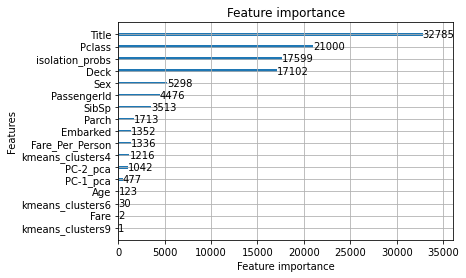

<Figure size 1152x864 with 0 Axes>

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/shap/explainers/_tree.py:349: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



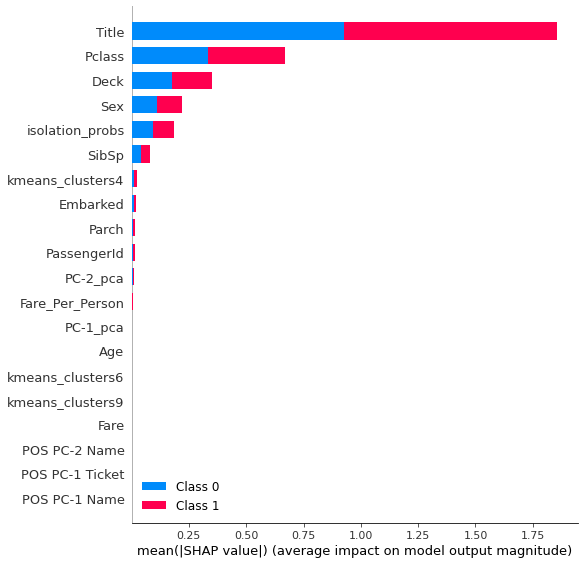

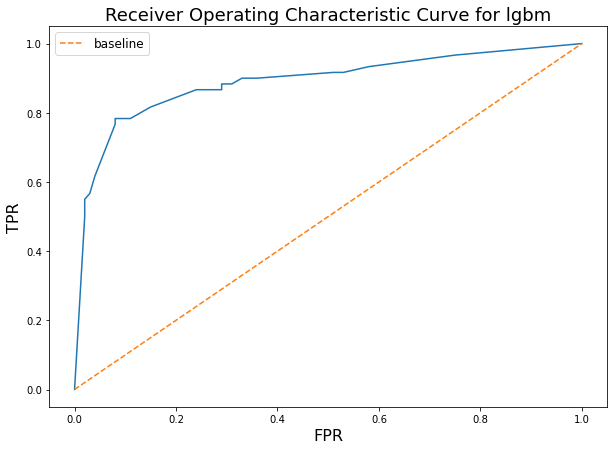

The ROC_AUC score is 0.8922500000000001
The Matthew correlation is 0.7169037159555932
-------------------
The accuracy is 0.86875
The macro F1 score is 0.8574761399787911
The micro F1 score is 0.86875
The weighted F1 score is 0.8674973488865323
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       100
         1.0       0.85      0.78      0.82        60

    accuracy                           0.87       160
   macro avg       0.87      0.85      0.86       160
weighted avg       0.87      0.87      0.87       160



In [4]:
# Run chosen blueprint
titanic_auto_ml.ml_bp02_multiclass_full_processing_lgbm_prob(preprocessing_type='full')

In [5]:
# Save pipeline
save_to_production(titanic_auto_ml, file_name='titanic_automl_instance')

# Predict on new data
In the beginning we kept a holdout dataset. We use this to simulate prediction on completely new data.

In [6]:
# load stored pipeline
titanic_auto_ml_loaded = load_for_production(file_name='titanic_automl_instance')

In [7]:
# predict on new data
titanic_auto_ml_loaded.ml_bp02_multiclass_full_processing_lgbm_prob(val_df, preprocessing_type='full')

# access predicted labels
val_y_hat = titanic_auto_ml_loaded.predicted_classes['lgbm']

Started Execute test train split at 18:51:30.
Started Apply datetime transformation at 18:51:30.
Started Start Spacy, POS tagging at 18:51:30.
Started PCA POS tags at 18:51:30.
Started PCA POS tags at 18:51:31.
Started PCA POS tags at 18:51:31.
Started Handle rare features at 18:51:31.
Started Remove cardinality at 18:51:31.
Started Onehot + PCA categorical features at 18:51:31.
Started Execute categorical encoding at 18:51:31.
Started  Delete columns with high share of NULLs at 18:51:31.
Started Fill nulls at 18:51:31.
Started Execute numerical binning at 18:51:31.
Started Handle outliers at 18:51:31.
Started Remove collinearity at 18:51:31.
Started Execute clustering as a feature at 18:51:31.
Started Execute clustering as a feature at 18:51:32.
Started Execute clustering as a feature at 18:51:32.
Started Execute clustering as a feature at 18:51:32.
Started Execute clustering as a feature at 18:51:32.
Started Execute clustering as a feature at 18:51:32.
Started Execute clustering as a

In [8]:
# Assess prediction quality on holdout data
print(classification_report(val_df_target, val_y_hat))
try:
    matthews = matthews_corrcoef(val_df_target, val_y_hat)
except Exception:
    print("Matthew failed.")
    matthews = 0
print(matthews)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        57
           1       0.79      0.76      0.78        34

    accuracy                           0.84        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.84      0.83        91

0.645910771771244
